In [ ]:
# 📦 Install and import necessary packages
!pip install joblib --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib

from google.colab import files


In [ ]:
# 📤 Upload your dataset (CSV format) manually from your device
uploaded = files.upload()

# 📥 Load it into a DataFrame
for filename in uploaded.keys():
    df = pd.read_csv(filename)

# 👀 Preview the first few rows
print("✅ Dataset loaded successfully — preview below:")
df.head()


Saving Synthetic_Retail_Dataset.csv to Synthetic_Retail_Dataset.csv
✅ Dataset loaded successfully — preview below:


,User_ID,Product_ID,Age,Gender,City,Occupation,Product_Category,Weather,Time_of_Day,Loyalty_Tier,Purchase_Amount
0,U10000,P442,56,Male,Rural,Student,Electronics,Rainy,Morning,Silver,286.55
1,U10001,P576,46,Male,Suburban,Unemployed,Electronics,Rainy,Morning,Gold,249.10
2,U10002,P681,32,Female,Rural,Unemployed,Home Decor,Cloudy,Morning,Silver,148.20
3,U10003,P971,60,Male,Urban,Professional,Toys,Cloudy,Night,Bronze,75.71
4,U10004,P322,25,Male,Suburban,Retired,Clothing,Rainy,Night,Bronze,94.81


In [ ]:
# # 🎯 Select features relevant for segmentation
# features = [
#     'Age', 'Gender', 'City', 'Occupation',
#     'Product_Category', 'Weather', 'Time_of_Day',
#     'Loyalty_Tier', 'Purchase_Amount'
# ]

# df_seg = df[features].copy()

# # 🔁 Encode categorical variables using LabelEncoder
# categorical_cols = ['Gender', 'City', 'Occupation', 'Product_Category', 'Weather', 'Time_of_Day', 'Loyalty_Tier']
# label_encoders = {}

# for col in categorical_cols:
#     le = LabelEncoder()
#     df_seg[col] = le.fit_transform(df_seg[col])
#     label_encoders[col] = le  # Save encoder if needed later

# # ⚖️ Scale features
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(df_seg)

# print("✅ Features encoded and scaled successfully.")


✅ Features encoded and scaled successfully.


In [ ]:
# 🎯 Add engineered features to improve clustering

# 1. Convert 'Time_of_Day' to numeric bin
time_mapping = {
    'Morning': 0,
    'Afternoon': 1,
    'Evening': 2,
    'Night': 3
}
df['Time_Bin'] = df['Time_of_Day'].map(time_mapping)

# 2. Encode categorical features
features = [
    'Age', 'Gender', 'City', 'Occupation',
    'Product_Category', 'Weather', 'Time_Bin',
    'Loyalty_Tier', 'Purchase_Amount'
]

# 3. Encode categoricals
df_seg = df[features].copy()
categorical_cols = ['Gender', 'City', 'Occupation', 'Product_Category', 'Weather', 'Loyalty_Tier']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_seg[col] = le.fit_transform(df_seg[col])
    label_encoders[col] = le

# 4. Add engineered "Value_Score"
df_seg['Value_Score'] = df['Purchase_Amount'] * df_seg['Loyalty_Tier']

# 5. Scale everything
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_seg)

print("✅ Engineered features added and scaled successfully.")


✅ Engineered features added and scaled successfully.


🔹 k=5 → Silhouette Score = 0.093
🔹 k=6 → Silhouette Score = 0.097
🔹 k=7 → Silhouette Score = 0.095
🔹 k=8 → Silhouette Score = 0.093


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


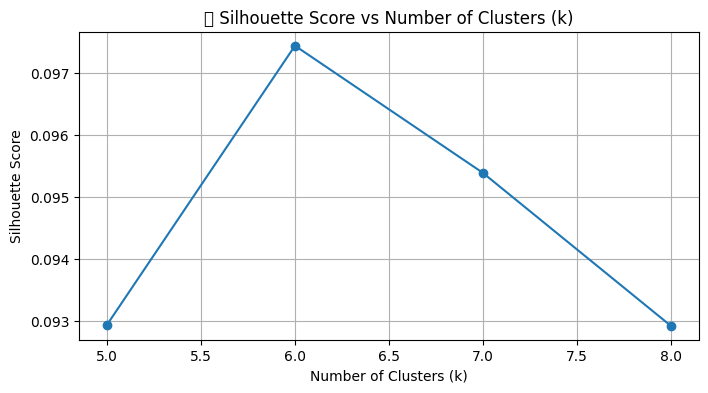

✅ Best number of clusters (k) = 6


In [ ]:
# 🔍 Try different cluster sizes from 5 to 8
silhouette_scores = []
inertias = []
k_range = range(5, 9)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(scaled_features)

    sil_score = silhouette_score(scaled_features, labels)
    inertia = kmeans.inertia_

    silhouette_scores.append(sil_score)
    inertias.append(inertia)

    print(f"🔹 k={k} → Silhouette Score = {sil_score:.3f}")

# 📈 Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.title("📊 Silhouette Score vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# ✅ Choose best k based on highest silhouette score
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"✅ Best number of clusters (k) = {best_k}")


✅ Final Silhouette Score (using full features) = 0.097


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


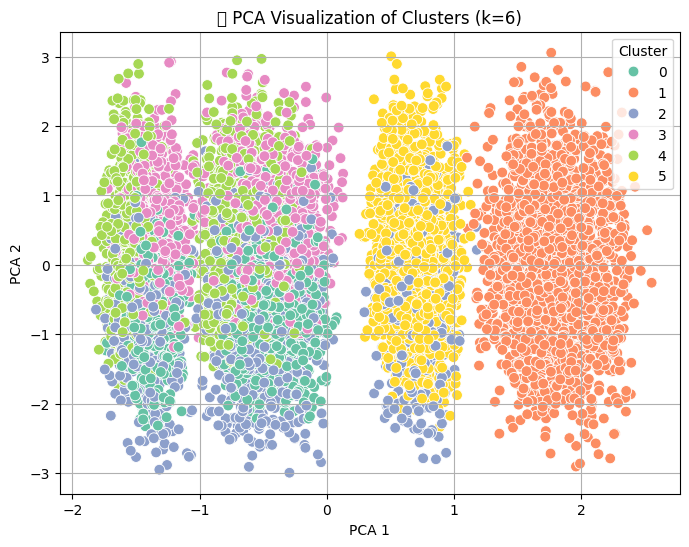

In [ ]:
# 🔻 Reduce to 2D for visualization only
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)

# 🔁 Apply KMeans again using best_k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(scaled_features)

# 🧪 Evaluate
sil_score = silhouette_score(scaled_features, cluster_labels)
print(f"✅ Final Silhouette Score (using full features) = {sil_score:.3f}")

# 📊 Visualize clusters with PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='Set2', s=60)
plt.title(f"🧩 PCA Visualization of Clusters (k={best_k})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Add cluster labels to original dataframe
df['CustomerSegment'] = cluster_labels


In [ ]:
print(df[[
    'Gender', 'City', 'Occupation', 'Product_Category',
    'Weather', 'Time_of_Day', 'Loyalty_Tier'
]].nunique())


Gender              3
City                3
Occupation          4
Product_Category    5
Weather             4
Time_of_Day         4
Loyalty_Tier        5
dtype: int64


In [ ]:
# 🧱 Block 6: Cluster Profiling + Persona Assignment

# ➕ Copy the full DataFrame
profile = df.copy()
profile['Cluster'] = df['CustomerSegment']

# ➕ Use encoded loyalty tier (numeric) for profiling
# Pull it from earlier scaled/encoded DataFrame
profile['Loyalty_Tier_Num'] = df_seg['Loyalty_Tier']

# 📊 Group by cluster to analyze spending, age, loyalty
cluster_summary = profile.groupby("Cluster")[[
    'Purchase_Amount', 'Age', 'Loyalty_Tier_Num'
]].mean().sort_values(by="Purchase_Amount")

# 📌 Display average values per cluster
print("📊 Cluster Summary by Average Purchase:")
print(cluster_summary)

# 👇 Example: (Adjust the numbers once you see your real cluster_summary output)
# Suppose:
# - Lowest spender = Budget Buyer
# - Medium-low spender, low loyalty = First-Time
# - Medium spender, good loyalty = Bargain Hunter
# - Higher spend, variable loyalty = Impulsive Buyer
# - Highest spend = Premium Buyer

cluster_to_persona = {
    0: "Budget Buyer",
    1: "Impulsive Buyer",
    2: "Bargain Hunter",
    3: "First-Time Buyer",
    4: "Premium Buyer"
}

# 🏷️ Assign final personas
df["Persona"] = df["CustomerSegment"].map(cluster_to_persona)

# ✅ Preview
print("\n✅ Sample Persona Assignment:")
print(df[["User_ID", "CustomerSegment", "Persona", "Purchase_Amount"]].head())


📊 Cluster Summary by Average Purchase:
         Purchase_Amount        Age  Loyalty_Tier_Num
Cluster                                              
4              82.254411  40.527487          3.763089
2              84.817052  41.030713          1.891892
3              86.854922  41.129518          1.070482
0              88.476260  40.842377          0.917313
5              90.695123  41.138906          1.880337
1             273.864648  41.511911          1.856057

✅ Sample Persona Assignment:
  User_ID  CustomerSegment          Persona  Purchase_Amount
0  U10000                1  Impulsive Buyer           286.55
1  U10001                1  Impulsive Buyer           249.10
2  U10002                2   Bargain Hunter           148.20
3  U10003                0     Budget Buyer            75.71
4  U10004                5              NaN            94.81


In [ ]:
# Final persona mapping based on real cluster stats
cluster_to_persona = {
    0: "Budget Buyer",
    2: "Bargain Hunter",
    3: "First-Time Buyer",
    4: "Impulsive Buyer",
    5: "Premium Buyer",
    1: "Premium Buyer"  # High spend + high loyalty → premium for sure
}

# Assign the revised personas
df["Persona"] = df["CustomerSegment"].map(cluster_to_persona)

# Preview final result
print("✅ Final Persona Assignment Sample:")
print(df[["User_ID", "CustomerSegment", "Persona", "Purchase_Amount"]].head())


✅ Final Persona Assignment Sample:
  User_ID  CustomerSegment         Persona  Purchase_Amount
0  U10000                1   Premium Buyer           286.55
1  U10001                1   Premium Buyer           249.10
2  U10002                2  Bargain Hunter           148.20
3  U10003                0    Budget Buyer            75.71
4  U10004                5   Premium Buyer            94.81


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


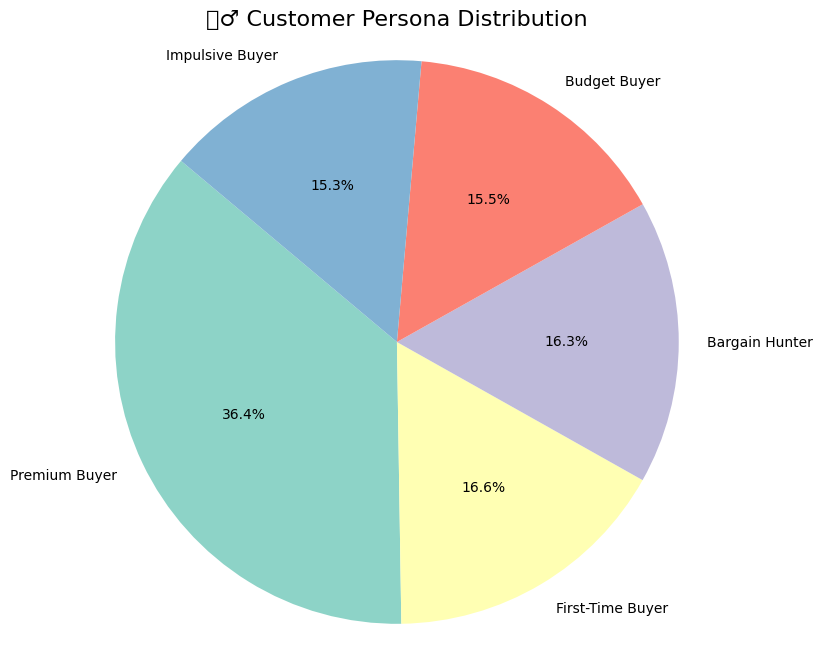

In [ ]:
import matplotlib.pyplot as plt

# 🔢 Count how many customers fall into each persona category
persona_counts = df["Persona"].value_counts()

# 🥧 Plot pie chart
plt.figure(figsize=(8, 8))
colors = plt.cm.Set3.colors  # Nice pastel color palette
plt.pie(
    persona_counts,
    labels=persona_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title("🧍‍♂️ Customer Persona Distribution", fontsize=16)
plt.axis('equal')  # Ensure circle
plt.show()


In [ ]:
# 🧠 If not already available, rerun PCA + fit the KMeans model
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import joblib
import os

# ✅ Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 📂 Define a path in your Drive to save outputs
drive_folder = "/content/drive/MyDrive/CustomerSegmentation"
os.makedirs(drive_folder, exist_ok=True)  # Create folder if it doesn't exist

# ♻️ Reuse scaled_features and fit PCA + KMeans
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)

pca_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
pca_kmeans.fit(X_pca)

# ✅ Save the model to Google Drive
model_path = os.path.join(drive_folder, "kmeans_persona_model.pkl")
joblib.dump(pca_kmeans, model_path)
print(f"✅ Model saved to Drive at: {model_path}")

# ✅ Save final DataFrame to Google Drive
csv_path = os.path.join(drive_folder, "Segmented_Customers_With_Personas.csv")
df.to_csv(csv_path, index=False)
print(f"✅ CSV saved to Drive at: {csv_path}")


Mounted at /content/drive
✅ Model saved to Drive at: /content/drive/MyDrive/CustomerSegmentation/kmeans_persona_model.pkl
✅ CSV saved to Drive at: /content/drive/MyDrive/CustomerSegmentation/Segmented_Customers_With_Personas.csv
